Kruskal-Wallis

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## "Existe diferença significativa entre os modelos em relação a sua acurácia?"
<lu>
<li>H0: Todos os modelos possuem médias relativamente iguais em termos de acurácia de classificação</li>
<li>H1: Pelo menos uma modelo é diferente dos outros em termos de média de acurácia de classificação</li>
</lu>

In [2]:
language = "portugues"    
#language = "english"  
MIN_P_VALUE = 0.05

def show_result(media, std, column, shapiro_stats, shapiro_p_value):
    result = False
    if language == "english":
        print(f"Model: {column}")
        print("The mean of the data is = " + str(media))    
        print("The standard deviation of the data is = " + str(std))    
        print("At 95% confidence level, the critical value of the Shapiro-Wilk test is = " + str(shapiro_stats))
        print("The calculated value of the Shapiro-Wilk test is = " + str(shapiro_p_value))
        # Conclusion
        if shapiro_p_value >= MIN_P_VALUE:
            print("At 95% confidence level, we have NO evidence to reject the hypothesis of data normality, according to the Shapiro-Wilk test")
            result = True
        else:
            print("At 95% confidence level, we have evidence to reject the hypothesis of data normality, according to the Shapiro-Wilk test")

    elif language == "portugues":
        print(f"Modelo: {column}")
        print("A media dos dados eh = " + str(media))    
        print("O desvio padrao dos dados eh = " + str(std))    
        print("Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = " + str(shapiro_stats))
        print("O valor calculado do teste de Shapiro-Wilk eh de = " + str(shapiro_p_value))
        # Conclusion
        if shapiro_p_value >= MIN_P_VALUE:
            print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")
            result = True
        else:
            print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")
    else:
        print("Unsupported language")
    print("\n-------------------------------------------------------------------------------------\n")
    return result

In [3]:
path = "C:/Users/mlb/TSC_Data/results4/"
columns = ["KNN","BOSS","HIVECOTE1","HIVECOTE2","RISE","ROCKET","STC","TSFC","Inception"]
columnsDict = {1:"KNN",2:"BOSS",3:"HIVECOTE1",4:"HIVECOTE2",5:"RISE"
               ,6:"ROCKET",7:"STC",8:"TSFC",9:"Inception"}
df = pd.read_csv(path+'AllAccuracies.csv',sep=';', names=columns)
df

,KNN,BOSS,HIVECOTE1,HIVECOTE2,RISE,ROCKET,STC,TSFC,Inception
0,0.953125,0.953125,0.947368,0.953125,0.937500,0.953125,0.947368,1.000000,0.976487
1,0.937500,0.937500,0.947368,0.937500,0.906250,0.921875,0.894737,0.947368,0.977171
2,0.952381,0.952381,0.894737,0.984127,0.936508,0.936508,0.894737,1.000000,0.977899
3,0.968254,0.984127,1.000000,0.920635,0.984127,0.984127,1.000000,1.000000,0.977779
4,0.936508,0.920635,1.000000,0.904762,0.968254,0.952381,1.000000,1.000000,0.976101
5,0.937500,0.937500,0.947368,0.921875,0.921875,0.937500,0.947368,0.947368,0.978227
6,0.953125,0.968750,0.947368,0.968750,0.953125,0.953125,0.947368,1.000000,0.977120
7,0.920635,0.936508,0.947368,0.920635,0.936508,0.936508,0.947368,1.000000,0.978300
8,0.968254,0.968254,0.947368,0.904762,0.968254,0.968254,0.894737,0.894737,0.978297
9,0.984127,0.984127,1.000000,0.968254,0.984127,0.968254,1.000000,1.000000,0.976658


C:\Users\mlb\AppData\Local\Temp\ipykernel_18612\1281192343.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a=df[col], ax=ax, hist=True, color="blue")
C:\Users\mlb\AppData\Local\Temp\ipykernel_18612\1281192343.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a=df[col], ax=ax, hist=

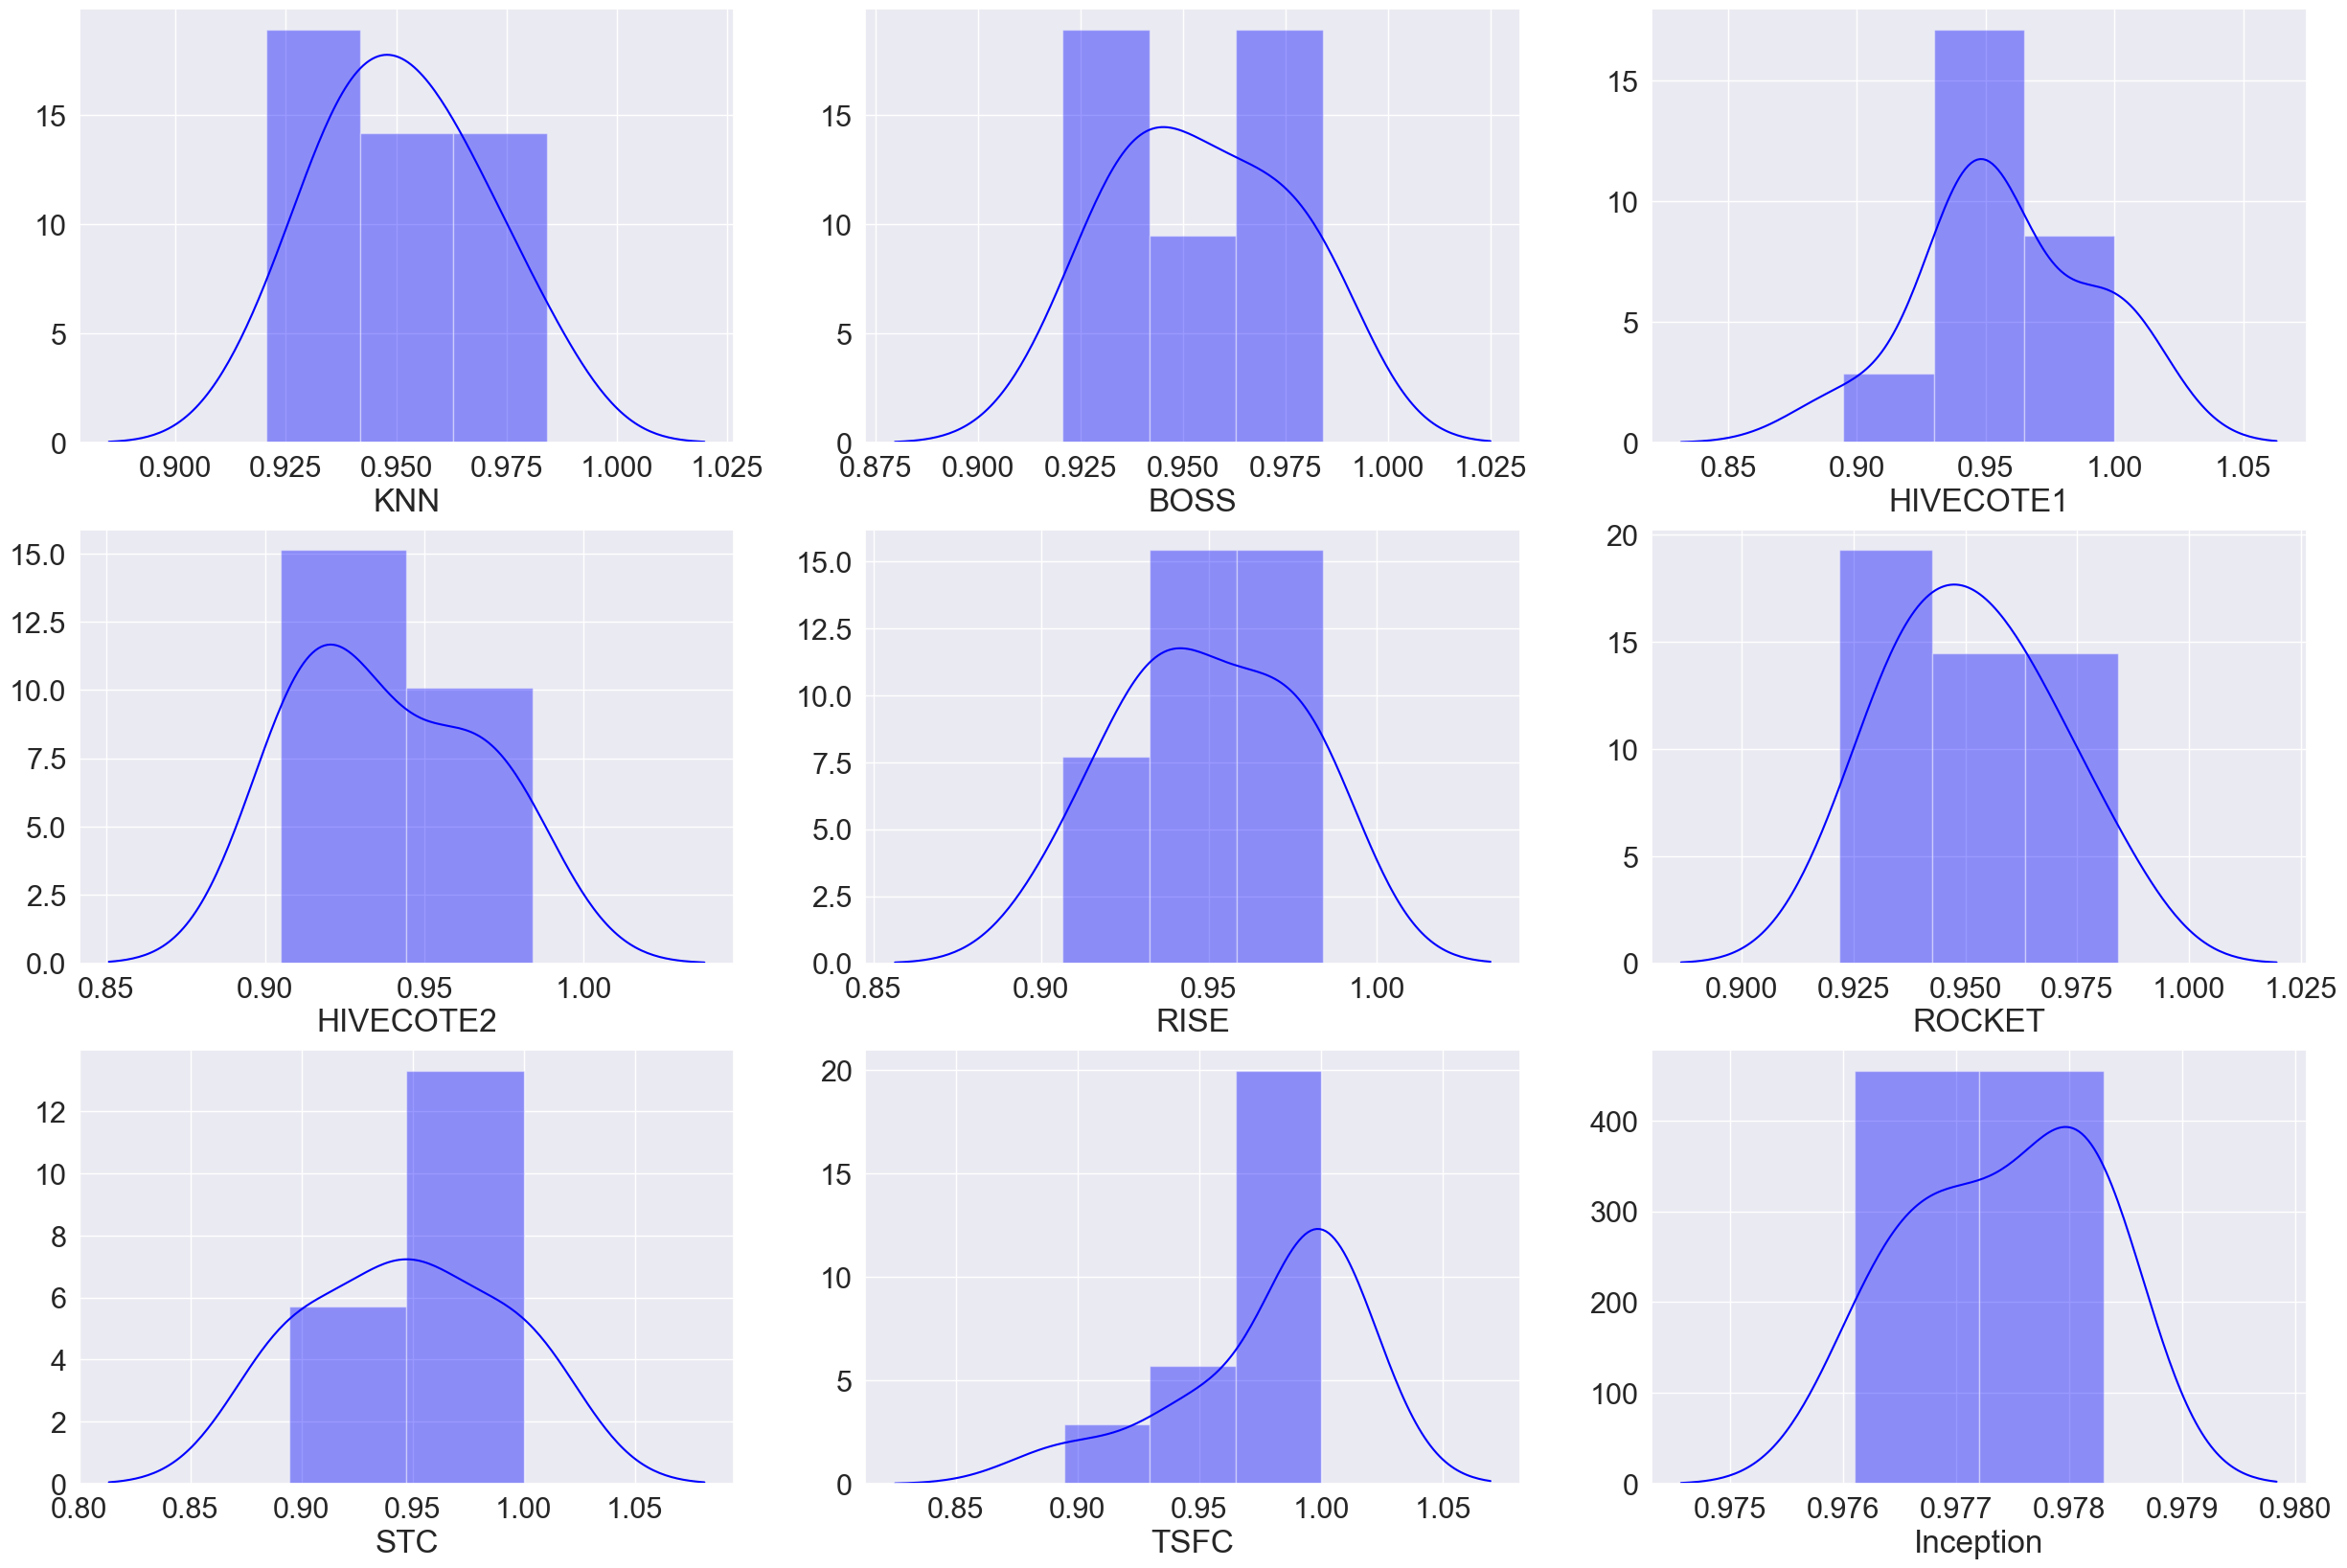

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(30,20))
for col, ax in zip(df.columns, axes.ravel()):
    sns.set(font_scale = 2)
    p = sns.distplot(a=df[col], ax=ax, hist=True, color="blue")
    p.set_ylabel("")
    #ax.set_title(f'Histograma para os dados de {col}')

In [6]:
import statsmodels.api as sm
import pylab

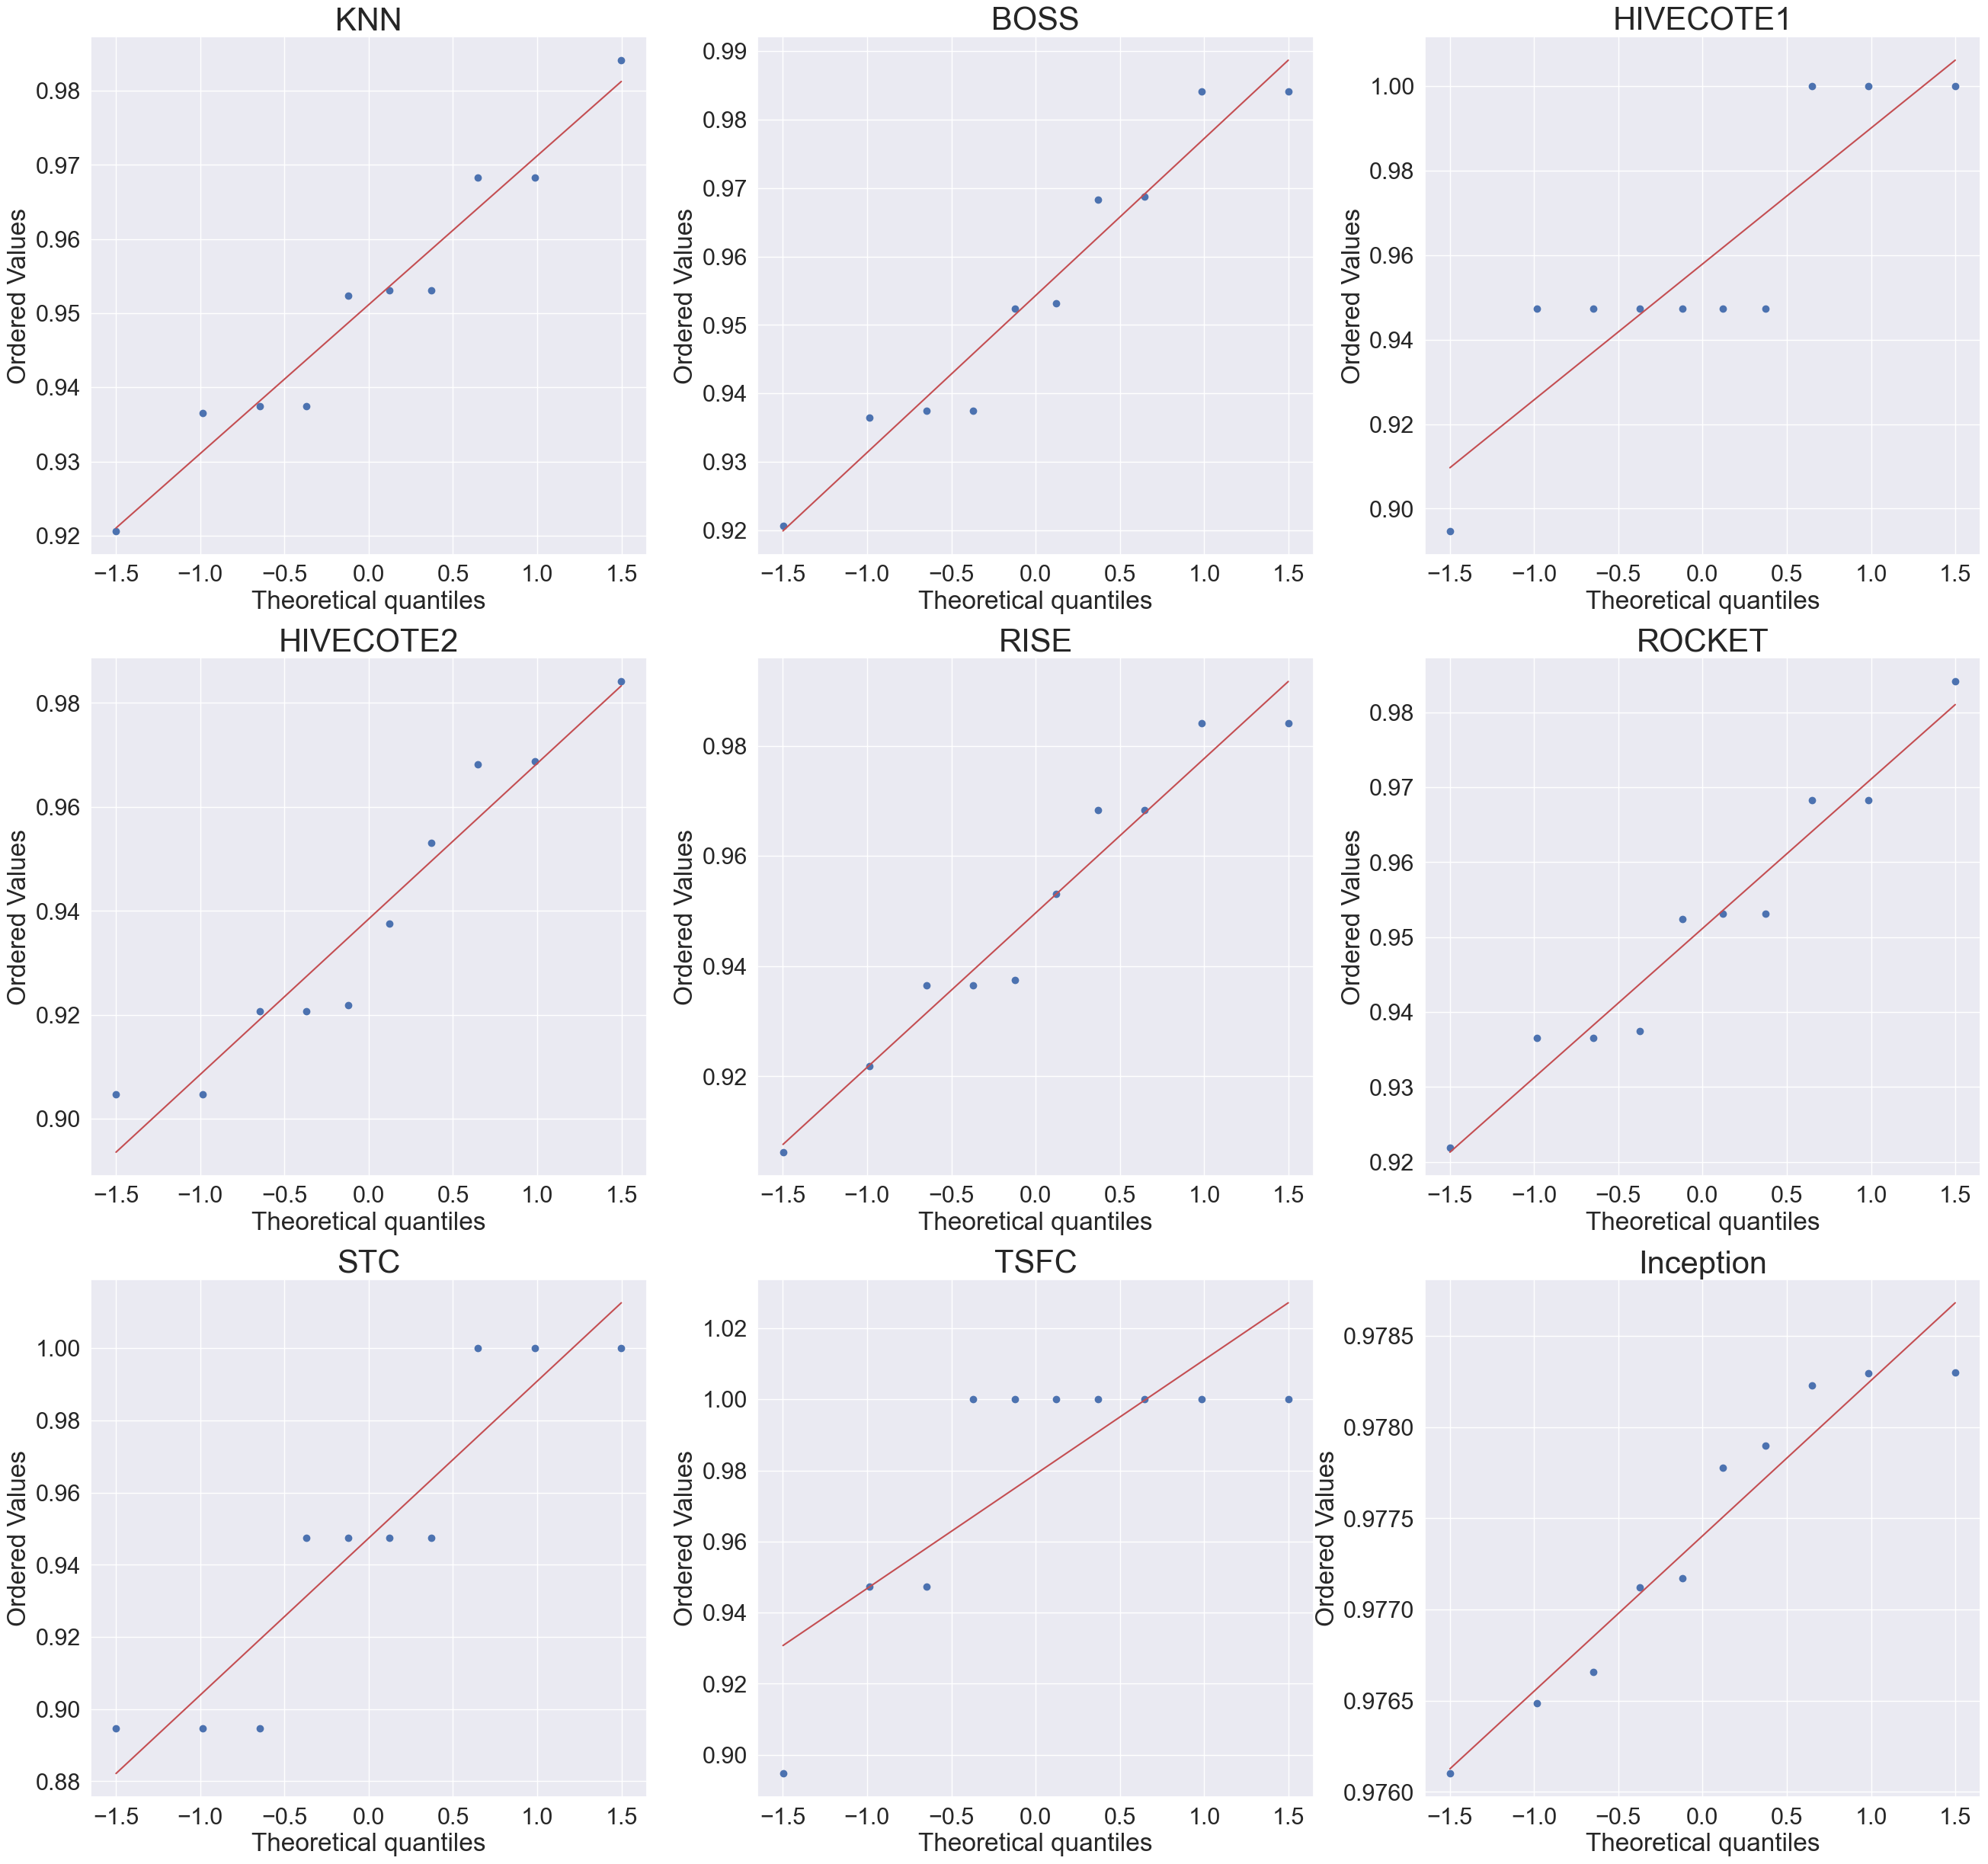

In [7]:
#QQ plot
fig, axes = plt.subplots(3, 3, figsize=(32,30))
for col, ax in zip(df.columns, axes.ravel()):
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f'{col}',fontsize=30)
    #ax.set_xlabel("")
plt.show()

D:\Programs\envs\RunModelsEnv\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


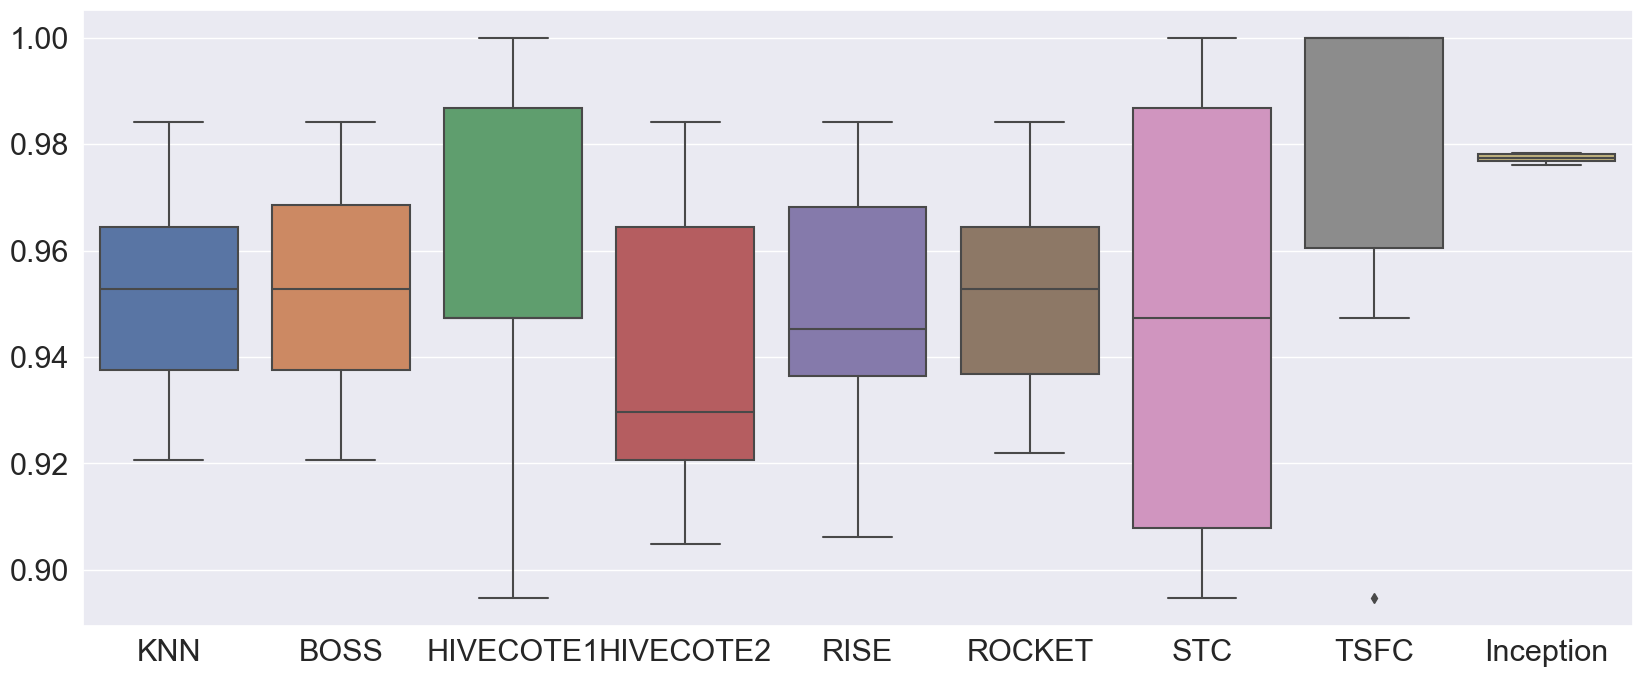

In [11]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(data=df)
sns.set(font_scale = 2)
ax.set_title(f'{col}',fontsize=15)
plt.show()

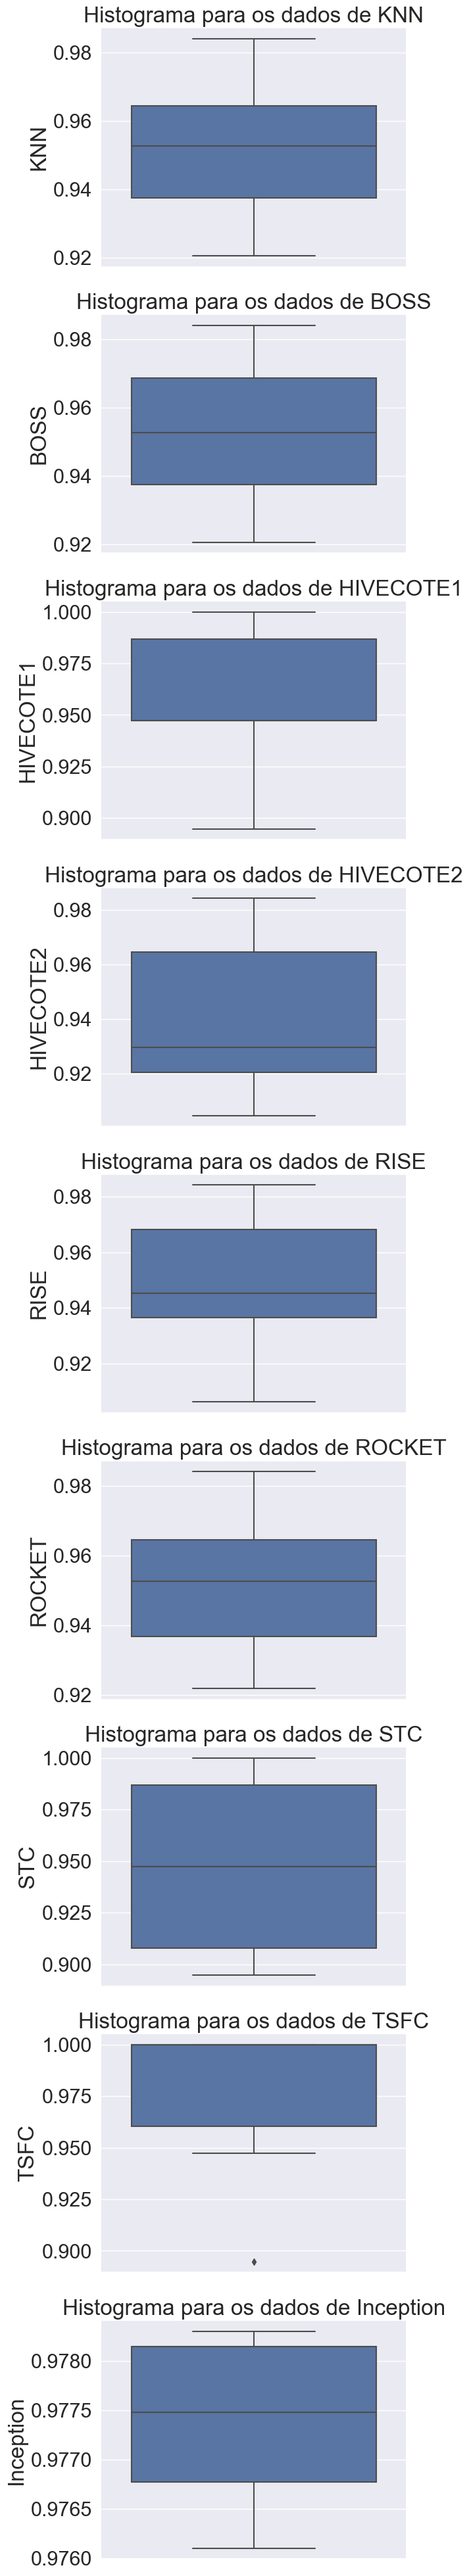

In [12]:
fig, axes = plt.subplots(len(df.columns), figsize=(6,50))
for i, plot in enumerate(df.columns):
    sns.boxplot(data=df, y=df[plot],ax=axes[i])
    axes[i].set_title(f'Histograma para os dados de {plot}')

In [13]:
def normalite_test(df):
    normal = 0
    non_normal = 0
    df_normalite = pd.DataFrame(columns=columns,index=['p_value','statistics'])
    for i, plot in enumerate(df.columns):
#         sns.boxplot(data=df, y=df[plot],ax=axes[i])
        shapiro_stats, shapiro_p_value = stats.shapiro(df[plot])
        df_normalite._set_value('p_value',plot,shapiro_p_value)
        df_normalite._set_value('statistics',plot,shapiro_stats)
        if(show_result(df[plot].mean(), df[plot].std(), plot, shapiro_stats, shapiro_p_value)):
            normal=normal+1;
        else:
            non_normal=non_normal+1;
    return normal, non_normal, df_normalite

In [14]:
normal, non_normal, df_normalite = normalite_test(df)
print(f"Quantidade de valores normais: {normal}, \nQuantidade de valores não normais: {non_normal}")
print(df_normalite)
df_normalite.to_csv(path_or_buf=path+"testeNormalidade.csv")
print("Valores salvos")

Modelo: KNN
A media dos dados eh = 0.9511408729999999
O desvio padrao dos dados eh = 0.01885645669408617
Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = 0.9594424366950989
O valor calculado do teste de Shapiro-Wilk eh de = 0.7794963121414185
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk

-------------------------------------------------------------------------------------

Modelo: BOSS
A media dos dados eh = 0.9542906745999999
O desvio padrao dos dados eh = 0.021608257738613613
Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = 0.9324221014976501
O valor calculado do teste de Shapiro-Wilk eh de = 0.47213461995124817
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk

-------------------------------------------------------------------------------------

Modelo: HIVECOTE1
A media d

In [15]:
def statical_test(normal, non_normal):
    statistic = 0
    pvalue = 0
    teste = ""
    if(non_normal==0):
        print("Todas as variáveis seguem uma distribuição normal")
        print("Runing ANOVA")
        teste = "ANOVA"
        statistic, pvalue = stats.f_oneway(df['KNN'],df['BOSS'],df['HIVECOTE1'],
                                           df['HIVECOTE2'],df['RISE'],df['ROCKET'], 
                                           df['STC'],df['TSFC'],df['Inception'])
        
    else:
        print("Pelo menos uma das variáveis não segue distribuição normal")
        print("Runing Kruskal-Wallis")
        teste = "Kruskal-Wallis"
        statistic, pvalue = stats.kruskal(df['KNN'],df['BOSS'],df['HIVECOTE1'],
                                           df['HIVECOTE2'],df['RISE'],df['ROCKET'], 
                                           df['STC'],df['TSFC'],df['Inception'])
    if pvalue >= MIN_P_VALUE:
        print(f"Com 95% de confianca, não temos evidências para rejeitar a hipótese de que todas os 8 modelos possuem médias relativamente iguais em termos de acurácia de classificação, segundo o teste {teste}")
    else:
        print(f"Com 95% de confianca, temos evidências para rejeitar H0 e aceitar a hipótese de que pelo menos um modelo é diferente dos outros 7 em termos de média de acurácia de classificação, segundo o teste {teste}")
    return statistic, pvalue

In [16]:
print(statical_test(normal, non_normal))

Pelo menos uma das variáveis não segue distribuição normal
Runing Kruskal-Wallis
Com 95% de confianca, temos evidências para rejeitar H0 e aceitar a hipótese de que pelo menos um modelo é diferente dos outros 7 em termos de média de acurácia de classificação, segundo o teste Kruskal-Wallis
(17.54505592989677, 0.024908234886666974)


In [18]:
# %conda install -c conda-forge scikit-posthocs

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Programs\envs\RunModelsEnv

  added / updated specs:
    - scikit-posthocs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-posthocs-0.7.0      |     pyhd8ed1ab_0          36 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          36 KB

The following NEW packages will be INSTALLED:

  scikit-posthocs    conda-forge/noarch::scikit-posthocs-0.7.0-pyhd8ed1ab_0 None




scikit-posthocs-0.7. | 36 KB     |            |   0% 
scikit-posthocs-0.7. | 36 KB     | ####4      |  45% 
scikit-posthocs-0.7. | 36 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done

Note: you may need to 

In [19]:
import scikit_posthocs as sp

df_posthoc_nemenyi= sp.posthoc_nemenyi(np.array(df).T)
df_posthoc_nemenyi.columns = columns
df_posthoc_nemenyi

,KNN,BOSS,HIVECOTE1,HIVECOTE2,RISE,ROCKET,STC,TSFC,Inception
1,1.000000,1.000000,0.999981,0.999737,1.000000,1.000000,1.000000,0.750108,0.770534
2,1.000000,1.000000,1.000000,0.997540,0.999999,1.000000,1.000000,0.865426,0.879883
3,0.999981,1.000000,1.000000,0.987705,0.999941,0.999972,0.999983,0.940751,0.949000
4,0.999737,0.997540,0.987705,1.000000,0.999892,0.999796,0.999714,0.329734,0.351429
5,1.000000,0.999999,0.999941,0.999892,1.000000,1.000000,1.000000,0.707023,0.728916
6,1.000000,1.000000,0.999972,0.999796,1.000000,1.000000,1.000000,0.737481,0.758374
7,1.000000,1.000000,0.999983,0.999714,1.000000,1.000000,1.000000,0.754257,0.774522
8,0.750108,0.865426,0.940751,0.329734,0.707023,0.737481,0.754257,1.000000,1.000000
9,0.770534,0.879883,0.949000,0.351429,0.728916,0.758374,0.774522,1.000000,1.000000


In [20]:
columnsDict[9]

'Inception'

In [21]:
for i, row in enumerate(df_posthoc_nemenyi):
    for j, col in enumerate(df_posthoc_nemenyi.columns):
        if i!=j and i>j:
            print(f"Modelo analisado:{col}")
            if(df_posthoc_nemenyi.iloc[i][j]>= MIN_P_VALUE):
                print(f"Com o p_valor {df_posthoc_nemenyi.iloc[i][j]} 95% de confiança,pode ser afirmado que NÃO existe \n uma diferença significativa entre os modelos {col} e {columnsDict[i+1]}")
            else:
                print(f"Com o p_valor {df_posthoc_nemenyi.iloc[i][j]} e 95% de confiança, pode ser afirmado que existe \n uma diferença significativa entre os modelos {col} e {columnsDict[i+1]}")
            print("\n")

Modelo analisado:KNN
Com o p_valor 0.9999999173513546 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e BOSS


Modelo analisado:KNN
Com o p_valor 0.9999806719509937 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e HIVECOTE1


Modelo analisado:BOSS
Com o p_valor 0.9999999173513546 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos BOSS e HIVECOTE1


Modelo analisado:KNN
Com o p_valor 0.9997371479810515 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e HIVECOTE2


Modelo analisado:BOSS
Com o p_valor 0.9975402510002407 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos BOSS e HIVECOTE2


Modelo analisado:HIVECOTE1
Com o p_valor 0.9877049928146289 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos

C:\Users\mlb\AppData\Local\Temp\ipykernel_18612\3371819777.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_posthoc_nemenyi.corr(), dtype=np.bool))


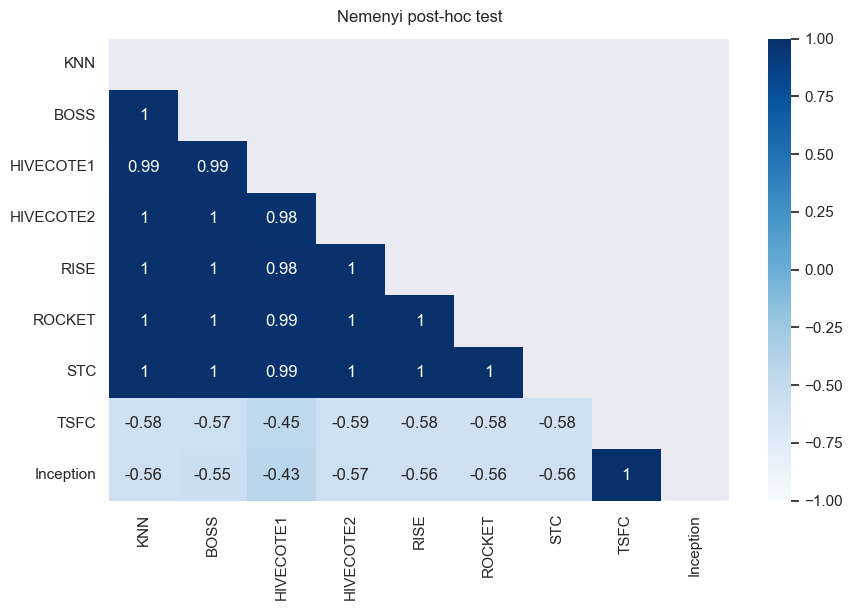

In [23]:
plt.figure(figsize=(10, 6))
sns.set(font_scale = 1)
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_posthoc_nemenyi.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_posthoc_nemenyi.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Nemenyi post-hoc test', fontdict={'fontsize':12}, pad=12);